In [5]:
import pandas as pd
filename = 'midtermdata-dev.csv'

In [6]:
data = pd.read_csv(filename)

In [7]:
print (data.describe())

             Week  Threadstarter  Subthreadstarter    NumPosts  Post Density  \
count  219.000000     219.000000        219.000000  219.000000    219.000000   
mean     2.251142       0.223744          0.091324    0.140822      0.111031   
std      1.531305       0.417707          0.288730    0.184075      0.279185   
min      1.000000       0.000000          0.000000    0.000000      0.000000   
25%      1.000000       0.000000          0.000000    0.040000      0.001000   
50%      2.000000       0.000000          0.000000    0.080000      0.007178   
75%      3.000000       0.000000          0.000000    0.160000      0.025928   
max      7.000000       1.000000          1.000000    1.000000      1.000000   

       Post Duration   In-Degree  Out-Degree      Degree   Authority  \
count     219.000000  219.000000  219.000000  219.000000  219.000000   
mean        0.180536    0.105023    0.055251    0.093950    0.100079   
std         0.281337    0.125699    0.140795    0.142393    0.1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


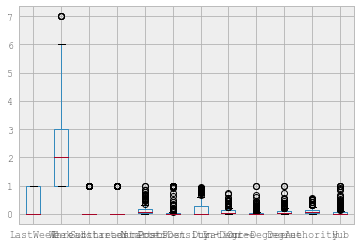

In [8]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC82B8358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FECA6E2EF0>]], dtype=object)

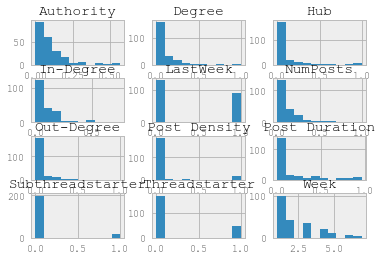

In [9]:
data.hist()

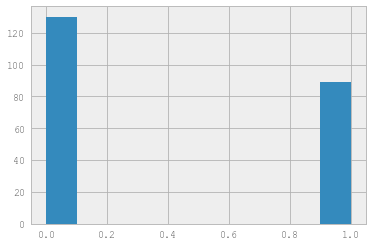

In [10]:
data['LastWeek'].hist()

LastWeek
False    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
True     [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

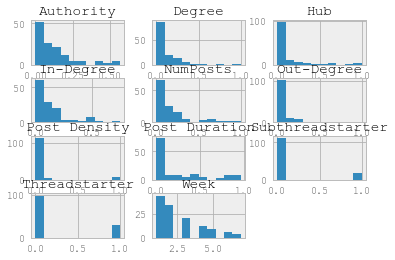

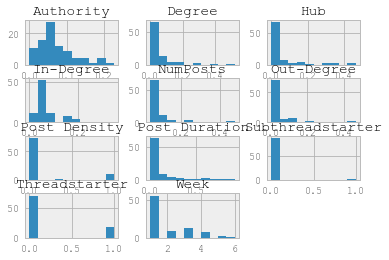

In [11]:
data.groupby('LastWeek').hist()

LastWeek
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Authority, dtype: object

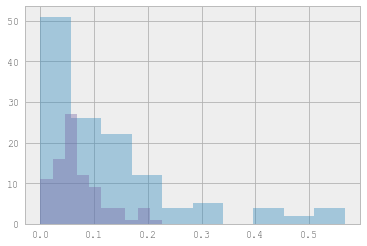

In [14]:
data.groupby('LastWeek').Authority.hist(alpha=0.4)

LastWeek
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: InDegree, dtype: object

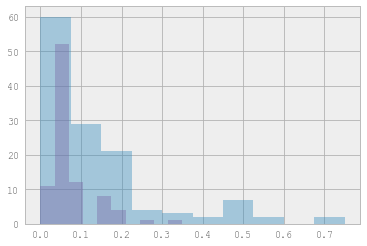

In [19]:
data.rename(columns = {'In-Degree':'InDegree'},inplace=True)
data.groupby('LastWeek').InDegree.hist(alpha=0.4)

LastWeek
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Week, dtype: object

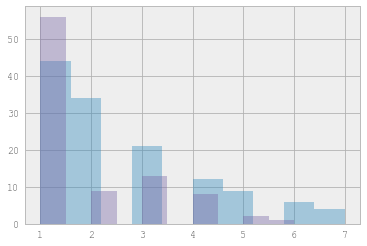

In [20]:
data.groupby('LastWeek').Week.hist(alpha=0.4)

LastWeek
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: NumPosts, dtype: object

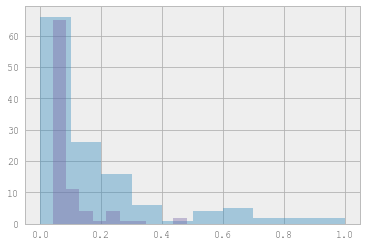

In [22]:
data.groupby('LastWeek').NumPosts.hist(alpha=0.4)

LastWeek
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: PostDuration, dtype: object

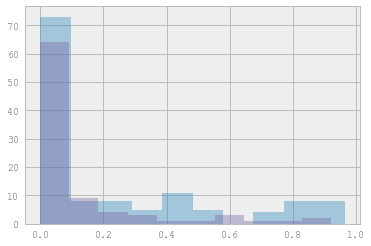

In [23]:
data.rename(columns = {'Post Duration':'PostDuration'},inplace=True)
data.groupby('LastWeek').PostDuration.hist(alpha=0.4)

LastWeek
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Hub, dtype: object

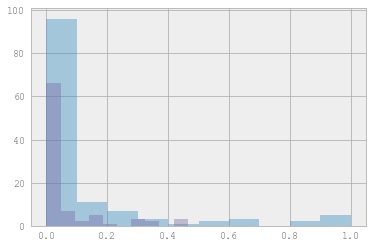

In [24]:
data.groupby('LastWeek').Hub.hist(alpha=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FECFEB4BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FED41DC7B8>]], dtype=object)

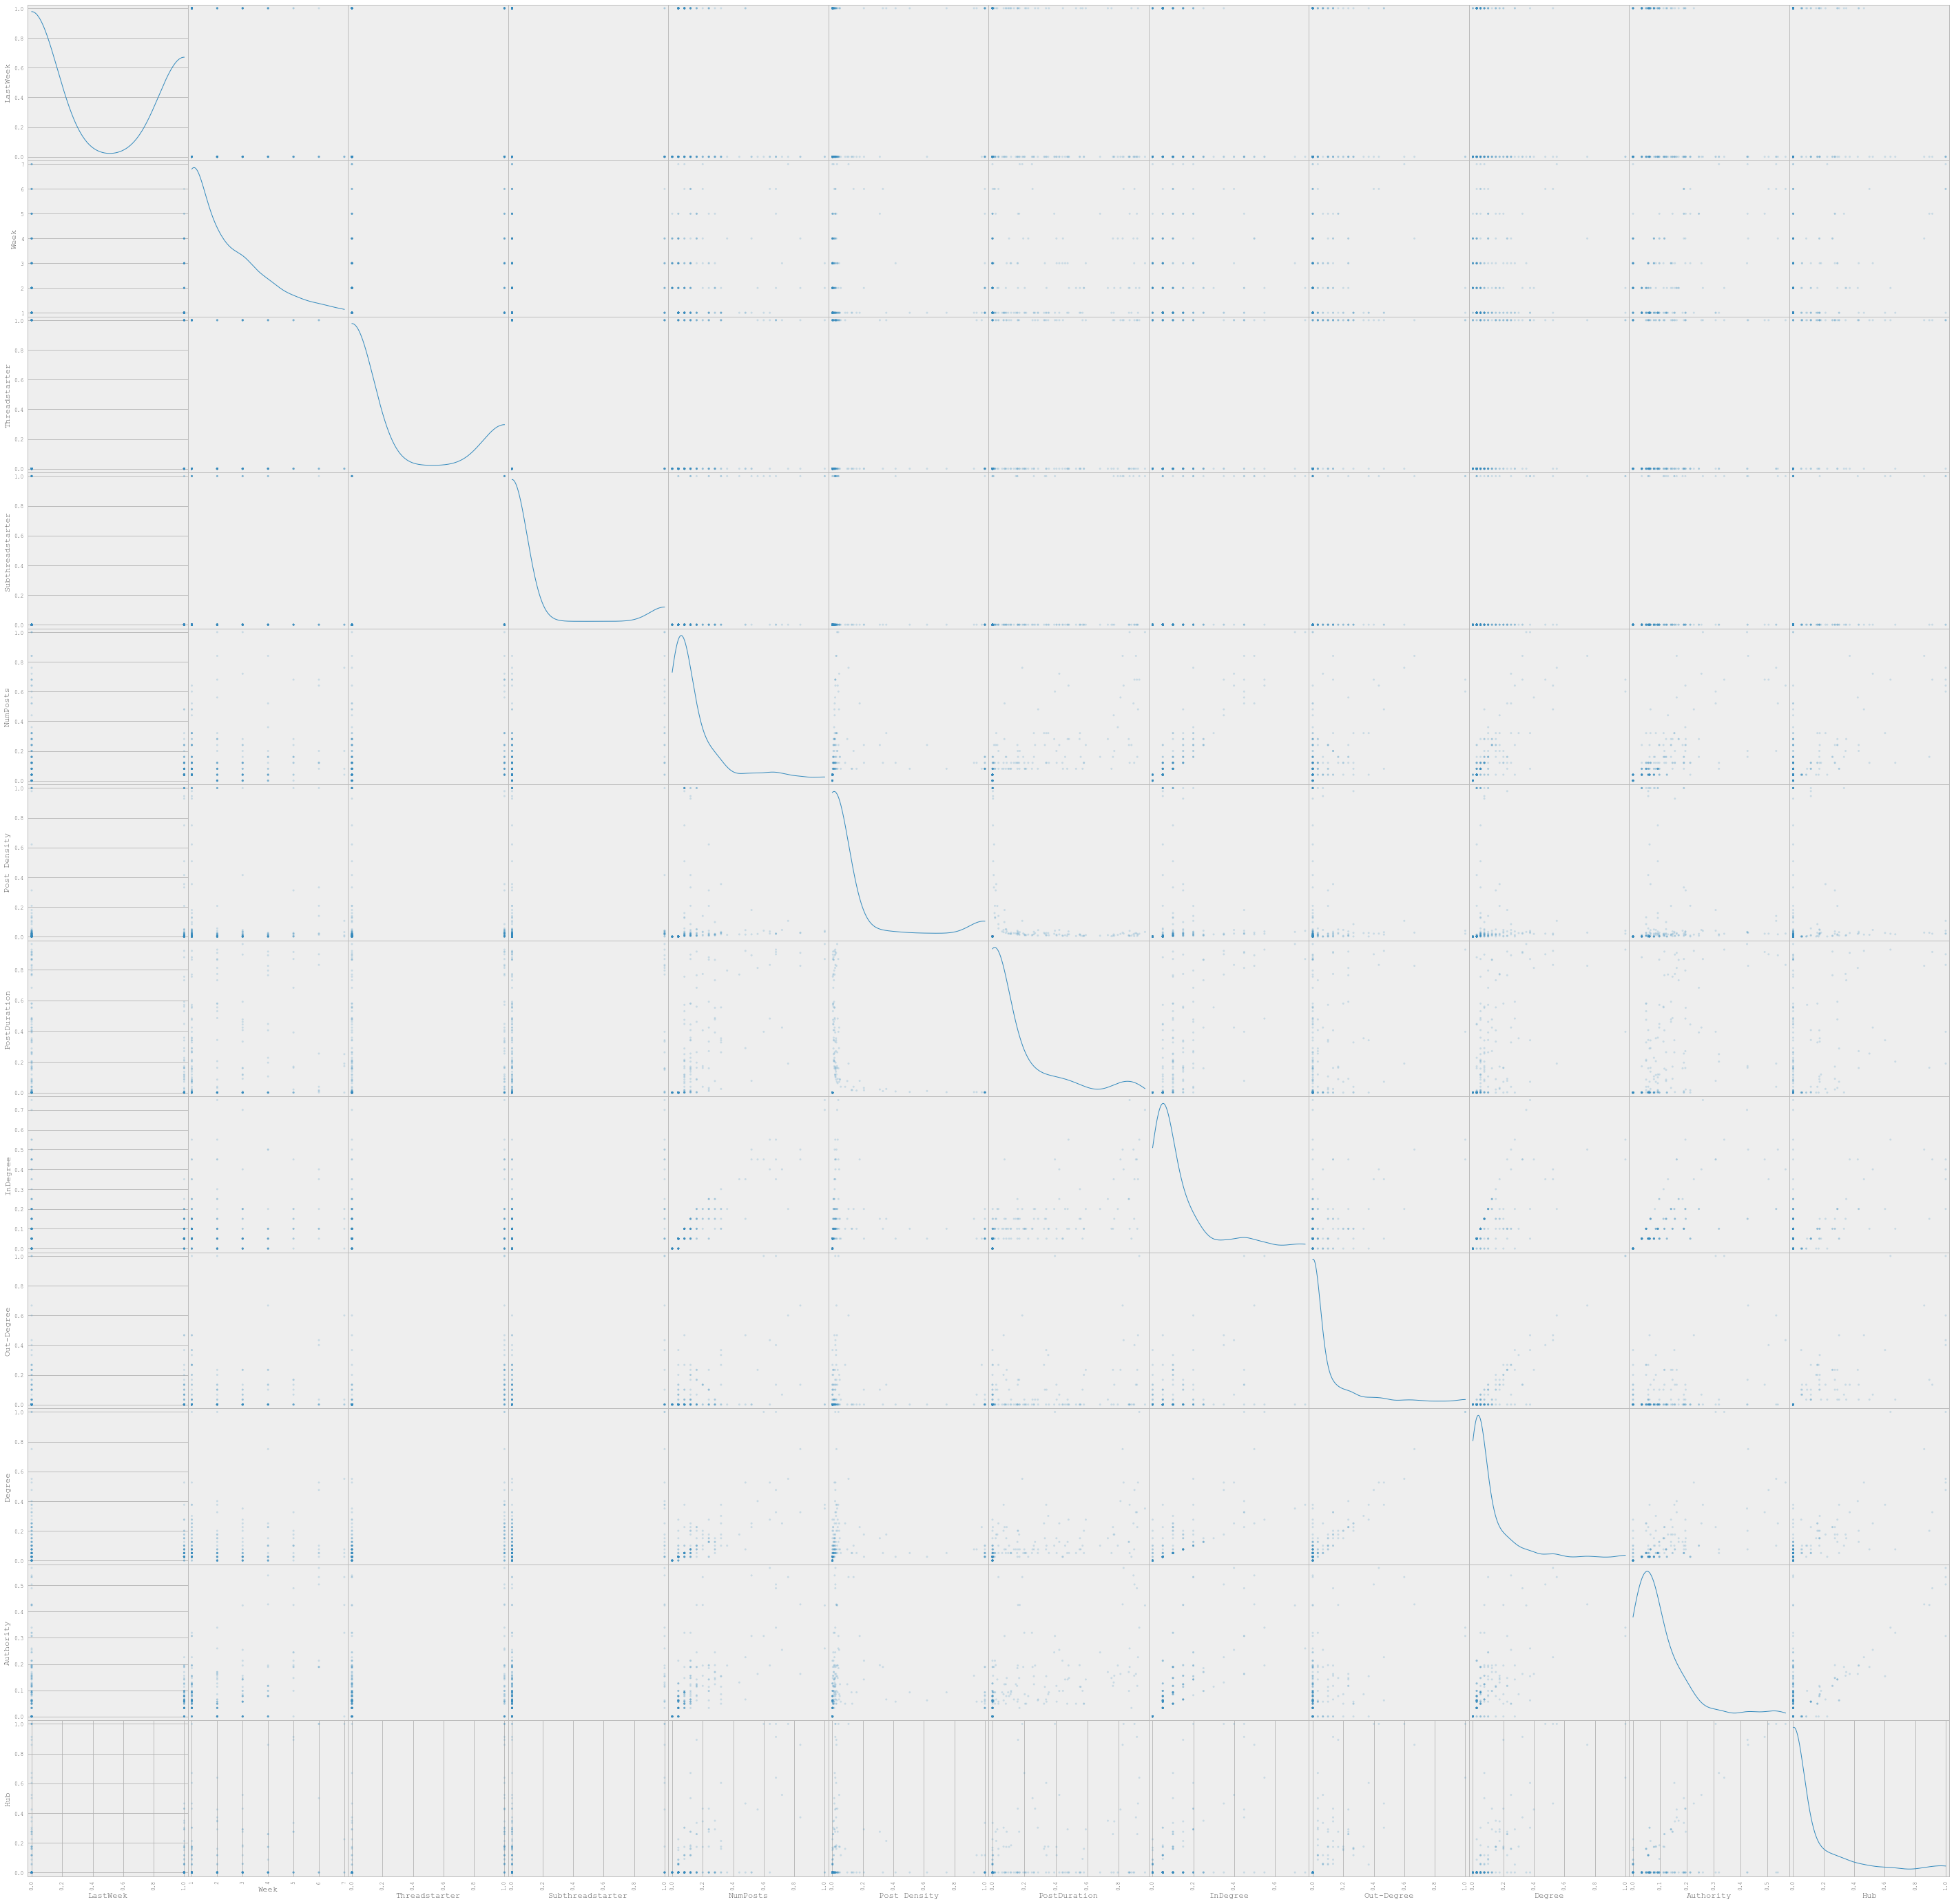

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(50, 50), diagonal='kde')

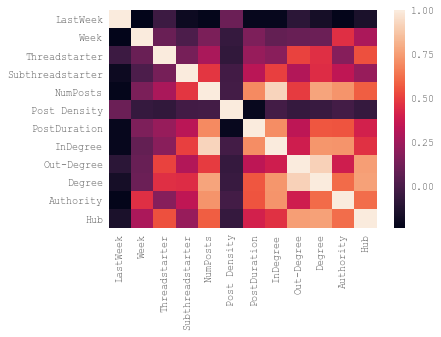

In [28]:
import seaborn as sns
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [31]:
#import pandas.rpy.common as com
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,LastWeek,Week,Threadstarter,Subthreadstarter,NumPosts,Post Density,PostDuration,InDegree,Out-Degree,Degree,Authority,Hub
LastWeek,1,-0.24,-0.043,-0.2,-0.23,0.1,-0.22,-0.22,-0.096,-0.17,-0.23,-0.15
Week,-0.24,1,0.098,0.01,0.15,-0.064,0.16,0.079,0.09,0.1,0.46,0.29
Threadstarter,-0.043,0.098,1,0.13,0.28,-0.078,0.23,0.19,0.51,0.46,0.18,0.55
Subthreadstarter,-0.2,0.01,0.13,1,0.48,-0.023,0.33,0.51,0.3,0.45,0.34,0.23
NumPosts,-0.23,0.15,0.28,0.48,1,-0.02,0.7,0.93,0.49,0.77,0.72,0.58
Post Density,0.1,-0.064,-0.078,-0.023,-0.02,1,-0.21,-0.02,-0.061,-0.054,-0.021,-0.064
PostDuration,-0.22,0.16,0.23,0.33,0.7,-0.21,1,0.71,0.34,0.56,0.56,0.41
InDegree,-0.22,0.079,0.19,0.51,0.93,-0.02,0.71,1,0.39,0.73,0.73,0.46
Out-Degree,-0.096,0.09,0.51,0.3,0.49,-0.061,0.34,0.39,1,0.91,0.39,0.76
Degree,-0.17,0.1,0.46,0.45,0.77,-0.054,0.56,0.73,0.91,1,0.61,0.77
